In [4]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
from scipy.optimize import curve_fit
from statsmodels.sandbox.regression.predstd import wls_prediction_std

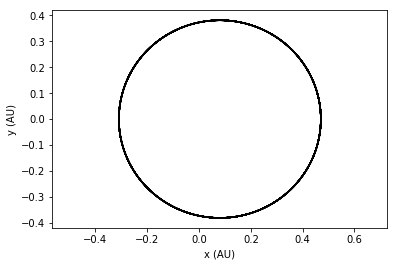

In [18]:
#opening the file where the coordinates for a purely newtonian orbit are saved, and plotting them in a x-y plane.

data = open("/Users/chrisvlahos/Documents/Mercury/cnewton.csv", "rb")
reader = csv.reader(data)

xval = np.array([])
yval = np.array([])


for i in reader:
    xval = np.append(xval, float(i[1]))
    yval = np.append(yval, float(i[2]))
    
plt.plot(xval,yval,color='k')
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.axis('equal')
plt.show() 

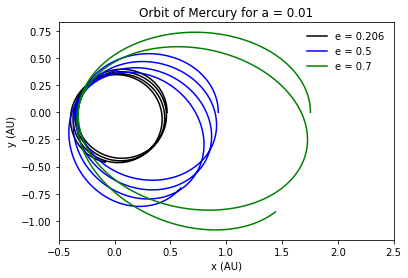

In [6]:
#Same as before plotting the orbits including this time GR corrections and different values of eccentricity.

data1 = open("/Users/chrisvlahos/Documents/Mercury/coord.csv", "rb")
reader = csv.reader(data1)

x1 = np.array([])
y1 = np.array([])

for i in reader:
    x1 = np.append(x1, float(i[1]))
    y1 = np.append(y1, float(i[2]))


data2 = open("/Users/chrisvlahos/Documents/Mercury/c001.csv", "rb")
reader = csv.reader(data2)

x2 = np.array([])
y2 = np.array([])

for i in reader:
    x2 = np.append(x2, float(i[1]))
    y2 = np.append(y2, float(i[2]))



data3 = open("/Users/chrisvlahos/Documents/Mercury/c7.csv", "rb")
reader = csv.reader(data3)

x3 = np.array([])
y3 = np.array([])

for i in reader:
    x3 = np.append(x3, float(i[1]))
    y3 = np.append(y3, float(i[2]))
    
plt.plot(x1,y1,color='k', label = 'e = 0.206')
plt.legend(loc='upper right',frameon=False)
plt.plot(x2,y2,color='b', label = 'e = 0.5')
plt.legend(loc='upper right',frameon=False)
plt.plot(x3,y3,color='g', label = 'e = 0.7')
plt.legend(loc='upper right',frameon=False)
plt.xlim(-.5, 2.5)
plt.title('Orbit of Mercury for a = 0.01' )
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.savefig('orbit.jpg', bbox_inches='tight')
plt.show()   

In [7]:
#We separate the time and precession angle values from a single file and create a separate one for times and one for precession
#In the end we also remove the NaN values insertes automatically in columns with fewer elements
#Here the orbits differ in eccentricity and have the same value for alpha parameter = 0.0008

reader = pd.read_csv("/Users/chrisvlahos/Documents/Mercury/precession_by_ecc.csv", header=None)

times_e = []
precession_e = []
for i in range(9):
    odd = 2*i+1
    even = 2*i
    time_col1 = reader.iloc[:, even:odd]
    time_col = np.array(time_col1)
    times_e.append(time_col)

for i in range(9):
    odd = 2*i+1
    even = 2*(i+1)
    prec_col1 = reader.iloc[:, odd:even]
    prec_col = np.array(prec_col1)
    precession_e.append(prec_col) 
        
for i in range(9):
    times_e[i] = times_e[i][~pd.isnull(times_e[i])]
    precession_e[i] = precession_e[i][~pd.isnull(precession_e[i])]         
      

[array([[ 12.07291565,  12.1628318 ]]), array([[ 8.39409033,  8.49133629]]), array([[ 5.96047611,  6.12566278]]), array([[ 4.07210379,  4.18463523]]), array([[ 2.74170841,  2.79635554]]), array([[ 1.70539438,  1.78211706]]), array([[ 0.98620687,  1.03797269]]), array([[ 0.48414359,  0.51163457]]), array([[ 0.15320611,  0.15320651]])]


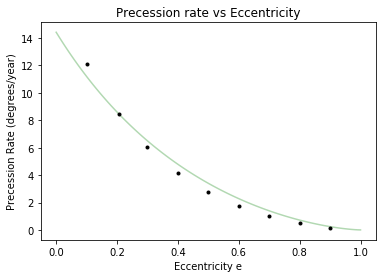

In [10]:
#We perform linear regression in every pair of columns (time and precession) and save the slope and 95% confidence intervals.
# Finally we perform model-fitting in these data pairs of (eccentricity, precession rate) and plot the points and best-fit line.

par_e = []
ci = []
for i in range(9):
    est = sm.OLS(precession_e[i],times_e[i])
    fit = est.fit()
    coeffs = fit.params
    conf = fit.conf_int(alpha=0.05, cols=None)
    ci.append(conf)
    par_e.append(coeffs)
       
print(ci)
        
m_e = np.array([])
for i in range(9):
    slope = par_e[i]
    m_e = np.append(m_e,slope)
    
ecc = [0.1,0.206,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
ecc = np.array(ecc)

def fun1(e,a):
    return a*np.sqrt((1-e)**3)/(1+e)

par = curve_fit(fun1,ecc,m_e)   
a = par[0]


xtest = np.linspace(0,1,100)
ytest = fun1(xtest,a)
lower = [12.073,8.394,5.96,4.07,2.74,1.7,0.986,0.48,0.15]
lower = np.array(lower)
upper = [12.16,8.49,6.1,4.18,2.79,1.78,1.04,0.51,0.15]
upper = np.array(upper)
plt.plot(xtest,ytest,'g',alpha = 0.3)
plt.errorbar(ecc,m_e, yerr = [m_e-lower,upper-m_e] ,fmt ='.',color='k')
plt.title('Precession rate vs Eccentricity')
plt.xlabel('Eccentricity e')
plt.ylabel('Precession Rate (degrees/year)')
plt.savefig('eccentricity.jpg', bbox_inches='tight')
plt.show()

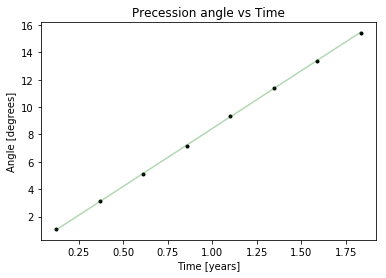

In [14]:
x = times_e[1] 
y = precession_e[1]
est = sm.OLS(y,x)
fit = est.fit()
xpts = np.linspace(x.min(), x.max(), 100)
ypts = fit.predict(xpts)
plt.plot(x,y, '.',color='k')
plt.plot(xpts,ypts,'g',alpha=0.3)
plt.title('Precession angle vs Time')
plt.xlabel('Time [years]')
plt.ylabel('Angle [degrees]')
plt.savefig('prec.jpg', bbox_inches='tight')
plt.show()

In [15]:
# Same procedure as previously but this time the eccentricity stays fixed while the GR correction parameter changes.

reader = pd.read_csv("/Users/chrisvlahos/Documents/Mercury/precession_alpha.csv", header=None)

times_a = []
precession_a = []
for i in range(8):
    odd = 2*i+1
    even = 2*i
    time_col1 = reader.iloc[:, even:odd]
    time_col = np.array(time_col1)
    times_a.append(time_col)

for i in range(8):
    odd = 2*i+1
    even = 2*(i+1)
    prec_col1 = reader.iloc[:, odd:even]
    prec_col = np.array(prec_col1)
    precession_a.append(prec_col) 
    

In [16]:
parameters_a = []
for i in range(8):
    est_a = sm.OLS(precession_a[i],times_a[i])
    fit_a = est_a.fit()
    coeffs = fit_a.params
    parameters_a.append(coeffs)

m_a = np.array([])
for i in range(8):
    slope = parameters_a[i]
    m_a = np.append(m_a,slope)  
alpha = [0.0001,0.0004,0.0008,0.0015,0.002,0.0025,0.003,0.0035] 
alpha = np.array(alpha)

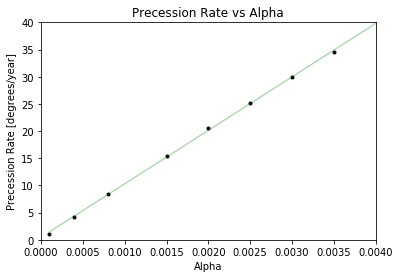

In [17]:
alpha = sm.add_constant(alpha)
est1 = sm.OLS(m_a, alpha)
fit1 = est1.fit()

xd = np.linspace(alpha.min(),alpha.max(),100)
xd = sm.add_constant(xd)
yd = fit1.predict(xd)

plt.plot(alpha[:,1],m_a, '.', color='k')
plt.plot(xd[:,1],yd,'g',alpha = 0.3)
plt.xlim(0, 0.004)
plt.ylim(0, 40)
plt.title('Precession Rate vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Precession Rate [degrees/year]')
plt.savefig('prec_rate.jpg', bbox_inches='tight')
plt.show()